## Implementation of linear regression

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)  # Convert to Pandas DataFrame
df['Price'] = data.target  # Add target column

# Display first few rows
print("Dataset Sample:")
print(df.head())

# Extract features (X) and target (y)
X = df.drop(columns=['Price'])  # Feature columns
y = df['Price']  # Target column

# Normalize features using Min-Max Scaling
X = (X - X.min()) / (X.max() - X.min())

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Linear Regression Model from Scratch
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        """ Train the model using Gradient Descent """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)  # Initialize weights
        self.b = 0  # Initialize bias

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b  # Compute predictions
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        """ Predict using trained model """
        return np.dot(X, self.w) + self.b

# Train our Linear Regression model
model = LinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train.values, y_train.values)  # Convert pandas DataFrame to NumPy array

# Make predictions
y_pred = model.predict(X_test.values)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # R² score (higher is better)

# Convert R² score to percentage accuracy
accuracy = r2 * 100

# Display performance metrics
print("\nPerformance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Performance Accuracy: {accuracy:.2f}%")


Dataset Sample:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Performance Metrics:
Mean Absolute Error (MAE): 0.82
Mean Squared Error (MSE): 1.08
R² Score: 0.1735
Performance Accuracy: 17.35%


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Trying the different regression models on the dataset

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train linear regression with polynomial features
model = LinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train_poly, y_train.values)

# Predict and evaluate again
y_pred_poly = model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression R² Score: {r2_poly:.4f}")
print(f"Polynomial Regression Accuracy: {r2_poly * 100:.2f}%")


Polynomial Regression R² Score: 0.2776
Polynomial Regression Accuracy: 27.76%


# Linear regression cant be used because it is not possible to predict the non-linear data relationships 

In [10]:
from sklearn.linear_model import LinearRegression

# Train a simple Linear Regression model
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train, y_train)

# Predictions
y_pred_sklearn = sklearn_lr.predict(X_test)

# Performance
r2_sklearn = r2_score(y_test, y_pred_sklearn)
print(f"Sklearn Linear Regression R² Score: {r2_sklearn:.4f}")
print(f"Accuracy: {r2_sklearn * 100:.2f}%")


Sklearn Linear Regression R² Score: 0.5758
Accuracy: 57.58%


# Random forest regression performs the best because of the non-linear data 



In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Accuracy: {r2_rf * 100:.2f}%")


Random Forest R² Score: 0.8052
Accuracy: 80.52%


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting R² Score: {r2_gbr:.4f}")
print(f"Accuracy: {r2_gbr * 100:.2f}%")


Gradient Boosting R² Score: 0.7756
Accuracy: 77.56%


# Thats how we can check that the data is linear or not

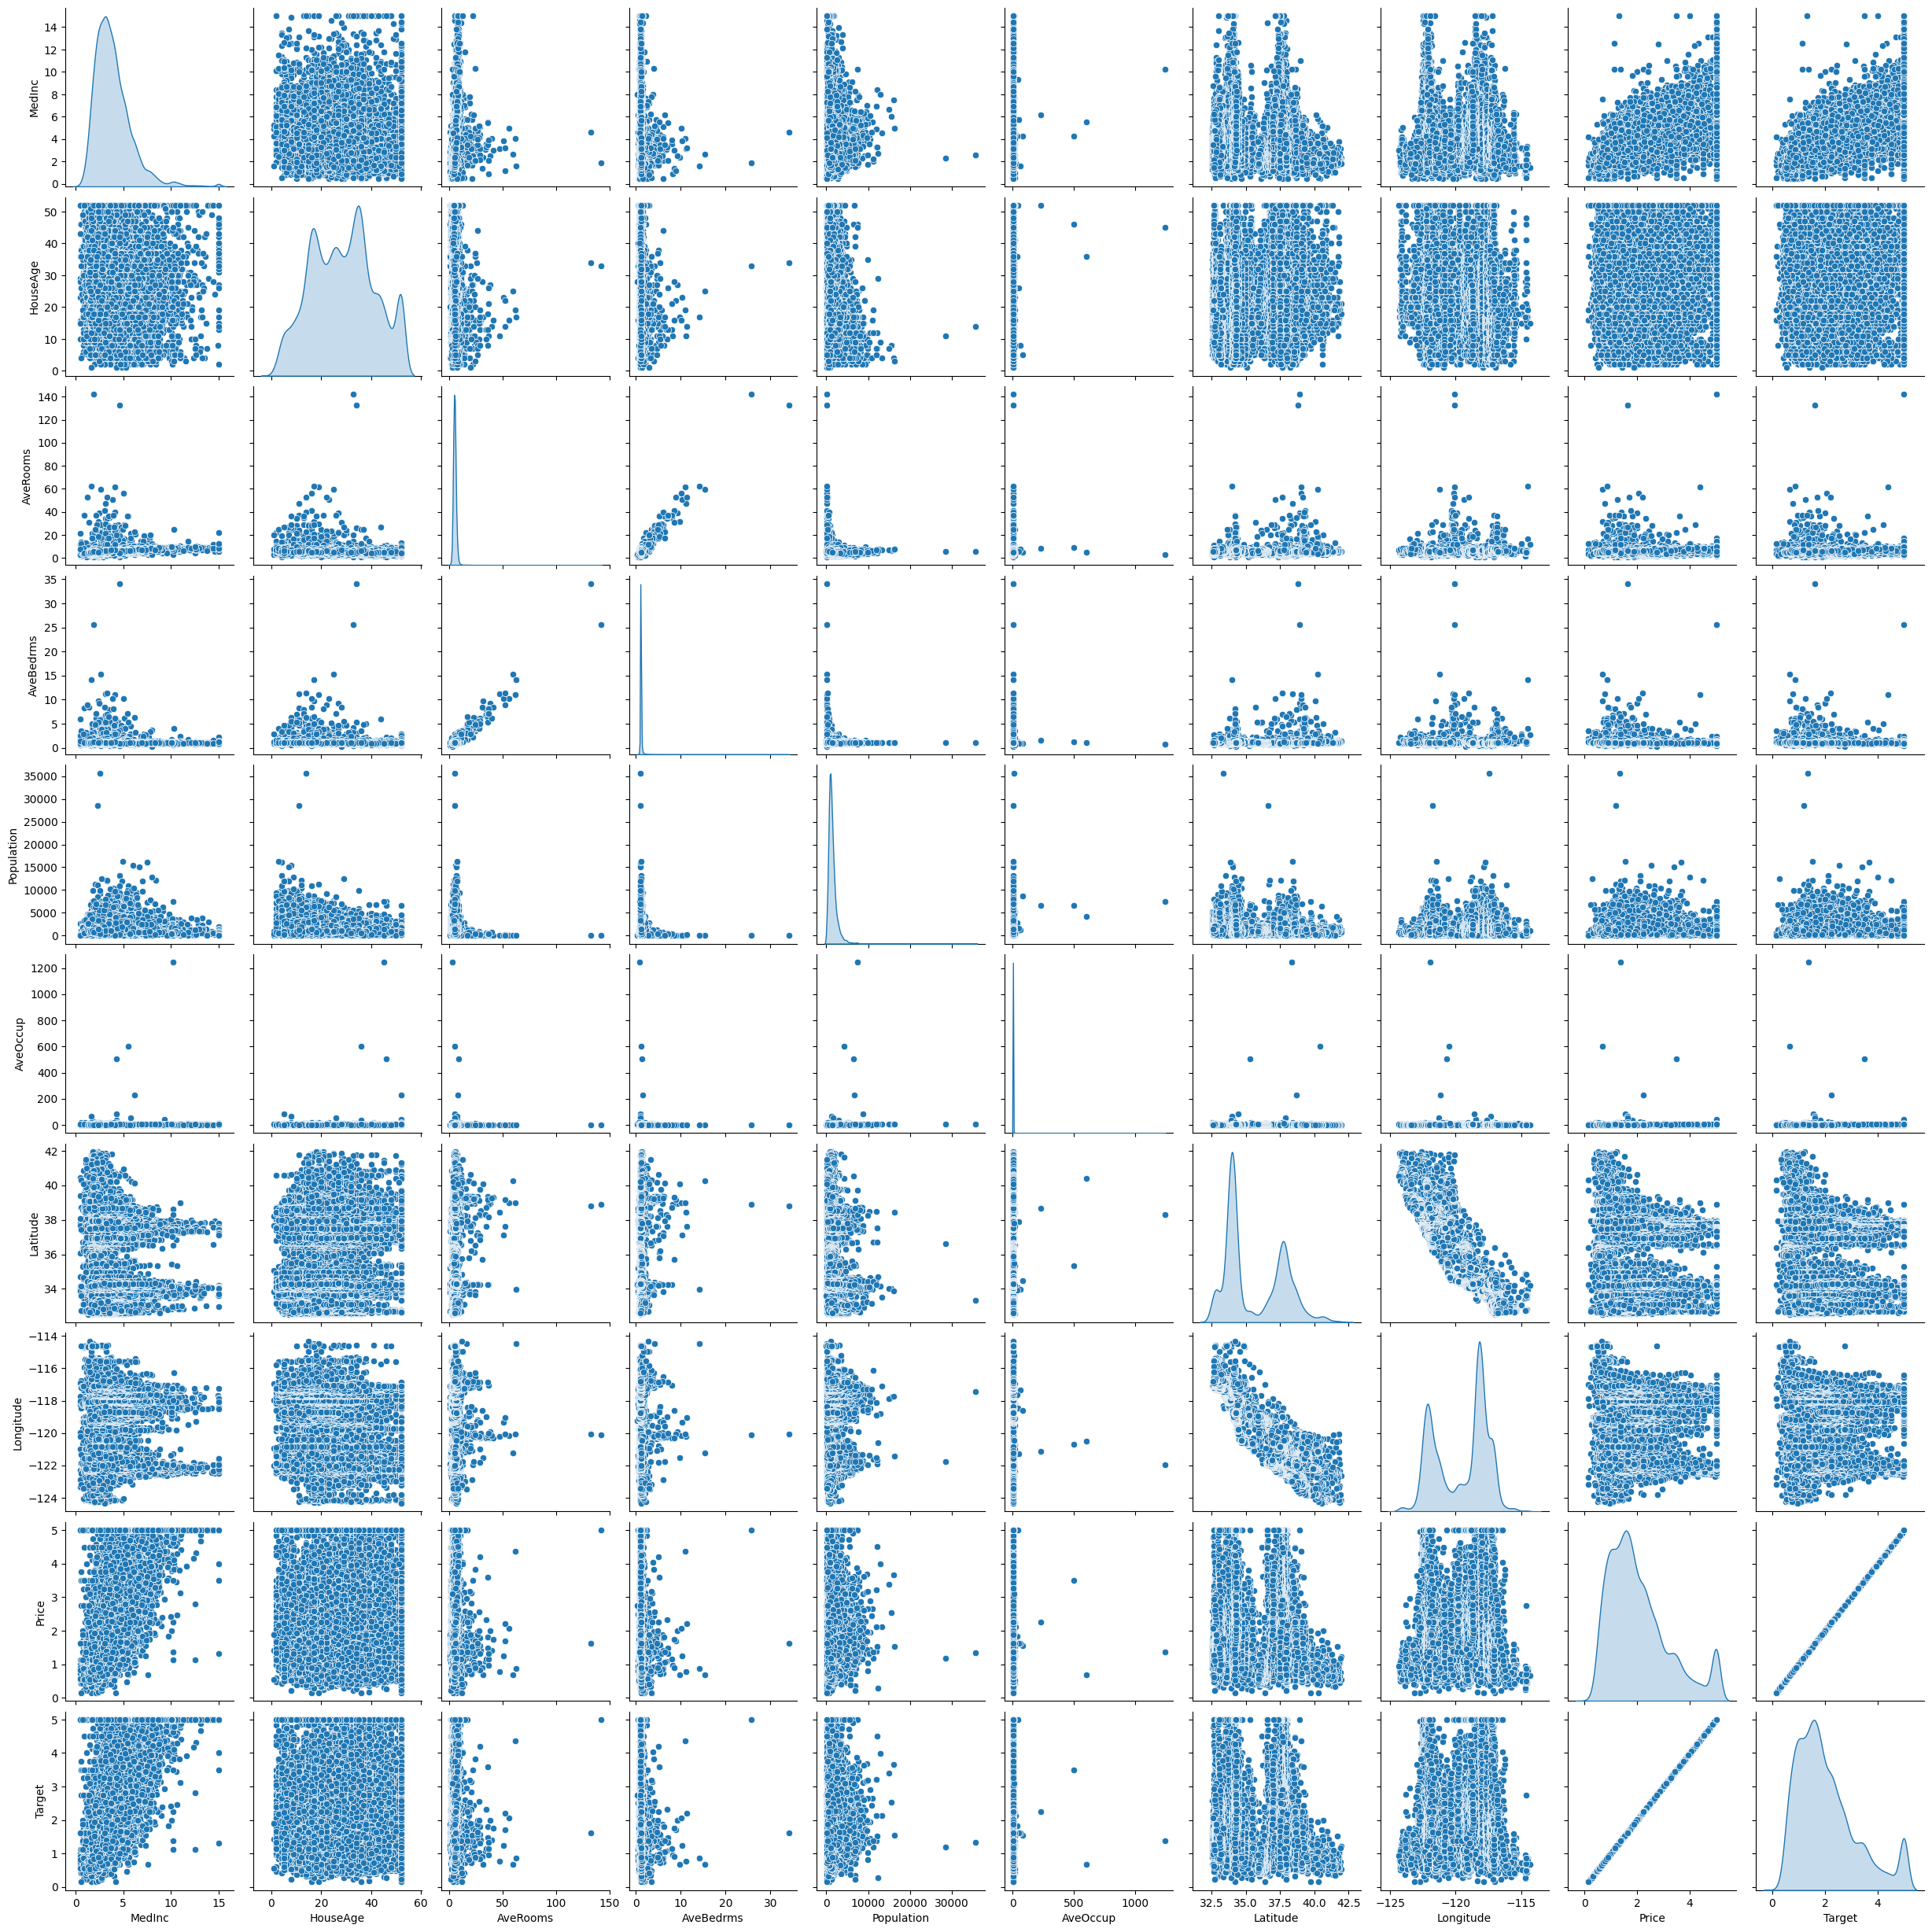

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df["Target"] = y  # Assuming `y` is your target variable

# Pairplot to check linearity
sns.pairplot(df, diag_kind="kde")
plt.show()


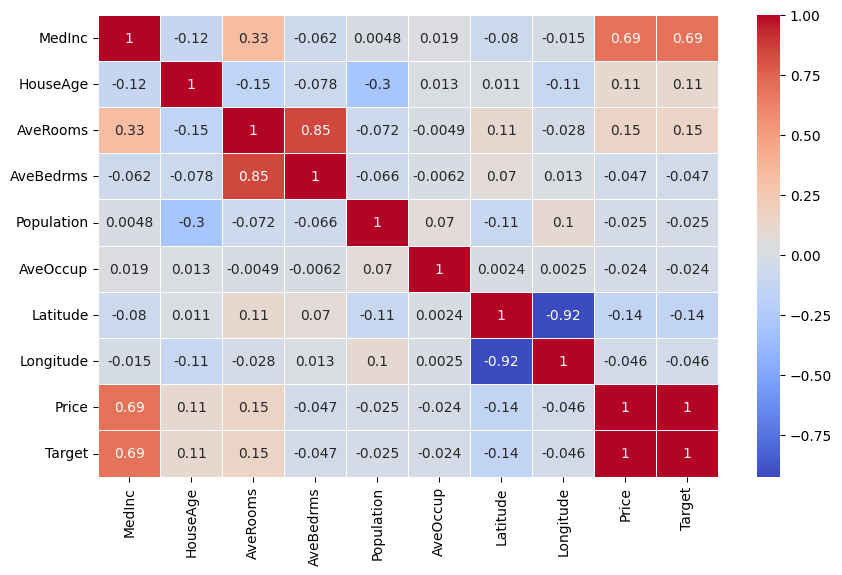

In [14]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()


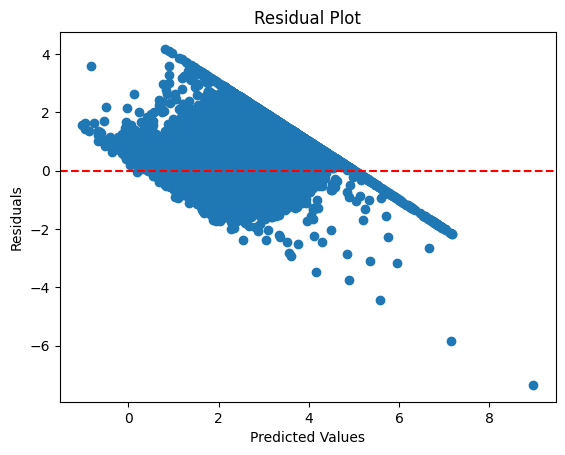

In [15]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
model = LinearRegression()
model.fit(X, y)

# Get predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Fit Linear Model
lin_model = LinearRegression()
lin_model.fit(X, y)
r2_linear = r2_score(y, lin_model.predict(X))

# Fit Polynomial Model (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
r2_poly = r2_score(y, poly_model.predict(X_poly))

print(f"Linear R² Score: {r2_linear:.4f}")
print(f"Polynomial R² Score: {r2_poly:.4f}")


Linear R² Score: 0.6062
Polynomial R² Score: 0.6833


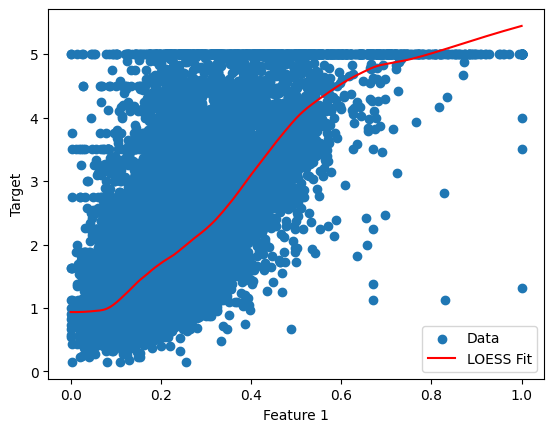

In [17]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(y, X.iloc[:, 0], frac=0.2)  # First feature
plt.scatter(X.iloc[:, 0], y, label="Data")
plt.plot(lowess[:, 0], lowess[:, 1], color="red", label="LOESS Fit")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.legend()
plt.show()
